In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\arcme\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [68]:
df=pd.read_csv('Nepse.csv',parse_dates=['Date'],index_col=0)
df.head()

,Close
Date,
2001-01-01,486.09
2001-01-02,486.58
2001-01-03,486.56
2001-01-04,482.20
2001-01-05,479.23


In [69]:
df.shape
df

,Close
Date,
2001-01-01,486.09
2001-01-02,486.58
2001-01-03,486.56
2001-01-04,482.20
2001-01-05,479.23
...,...
2020-03-18,1255.80
2020-03-19,1269.30
2020-03-22,1251.45


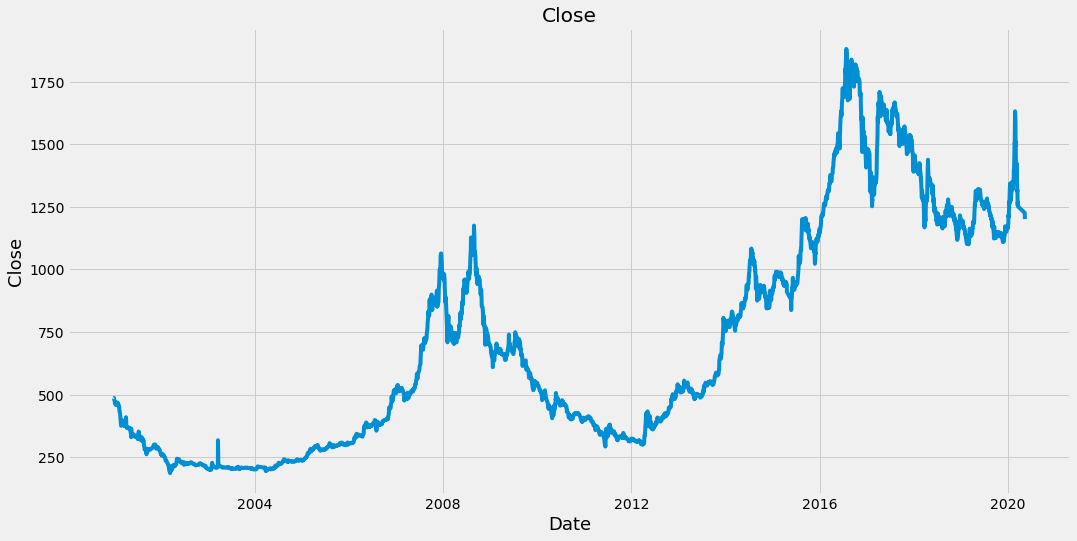

In [70]:
plt.figure(figsize=(16,8))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()

In [71]:
df.shape

(4480, 1)

In [72]:
data=df.filter (['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.80)
training_data_len

3584

In [73]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.17689045],
       [0.1771795 ],
       [0.1771677 ],
       ...,
       [0.62836901],
       [0.61344478],
       [0.59894528]])

In [74]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.17689045, 0.1771795 , 0.1771677 , 0.17459578, 0.1728438 ,
       0.17006542, 0.16645529, 0.16430809, 0.16302803, 0.16200752,
       0.16167128, 0.16080414, 0.16053869, 0.16107549, 0.16196622,
       0.16179515, 0.16466792, 0.1658359 , 0.16646119, 0.16626063,
       0.16564124, 0.16467972, 0.16298673, 0.16386567, 0.16200162,
       0.16075105, 0.15875132, 0.15652743, 0.15709373, 0.15167853,
       0.14935436, 0.14465884, 0.14425771, 0.14080685, 0.13501413,
       0.127611  , 0.124927  , 0.11153059, 0.1114598 , 0.11265728,
       0.1211458 , 0.12233148, 0.12211912, 0.12390059, 0.12469694,
       0.12365874, 0.12131687, 0.12072698, 0.12032586, 0.11926405,
       0.11752388, 0.11341824, 0.11282245, 0.1125275 , 0.11583089,
       0.11075193, 0.11140081, 0.11313509, 0.11836152, 0.11191992])]
[0.11252160473800016]



In [75]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3524, 60, 1)

In [77]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [78]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

3524/3524 [==============================] - 374s 106ms/step - loss: 5.6273e-04


In [80]:
#Create testing dataset
#create a new array containing scaled vales from index 1675 to 2168
test_data = scaled_data[training_data_len -60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [81]:
#Convert he data to a numpy array
x_test = np.array(x_test)

In [82]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [83]:
#Get the models predicte price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [84]:
#Get RMSE
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

62.997732091631214

<ipython-input-85-15b0a3f35bcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


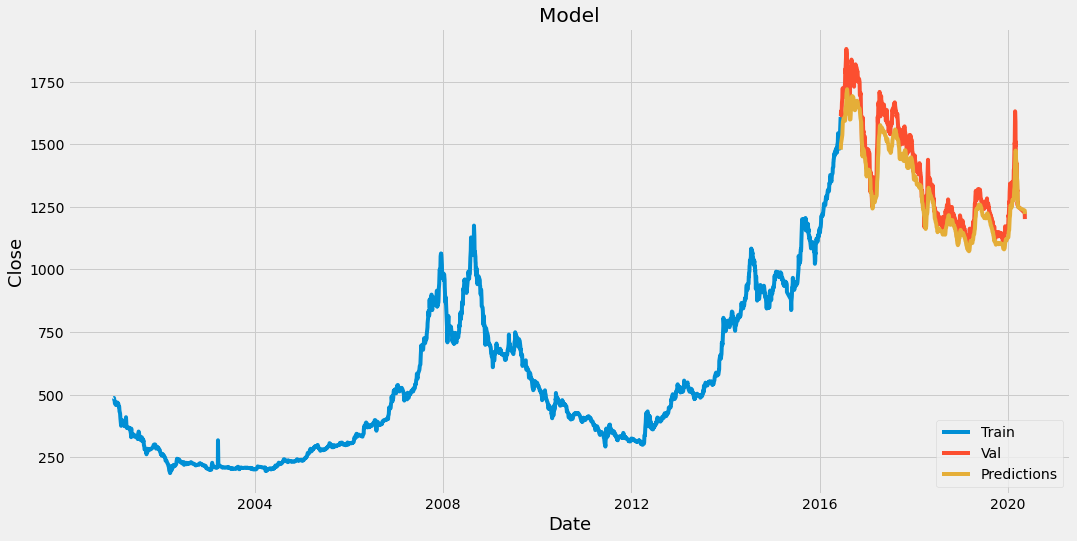

In [85]:
#Plot the data
train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [86]:
#show the valid and redicted prices
valid

,Close,Predictions
Date,,
2016-06-14,1614.15,1478.739868
2016-06-15,1620.47,1491.810059
2016-06-16,1632.94,1502.862793
2016-06-19,1622.27,1513.048462
2016-06-20,1615.10,1519.143311
...,...,...
2020-03-18,1255.80,1286.281738
2020-03-19,1269.30,1264.371826
2020-03-22,1251.45,1248.809326


In [87]:
nepse=pd.read_csv('nepse.csv')
nepse_quote=nepse[(nepse.Date<'5/13/2020')]
nepse_quote

,Date,Close
0,1/1/2001,486.09
1,1/2/2001,486.58
2,1/3/2001,486.56
3,1/4/2001,482.20
4,1/5/2001,479.23
...,...,...
4474,3/17/2020,1272.06
4475,3/18/2020,1255.80
4476,3/19/2020,1269.30
4477,3/22/2020,1251.45


In [88]:
#Get the quote
nepse=pd.read_csv('nepse.csv')
nepse_quote=nepse[(nepse.Date<'5/13/2020')]
#Create new dataframe
new_df = nepse_quote.filter(['Close'])
#Get the last 60 days closing price values and convert  the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be between 0 and 1
last_60_days_scaled= scaler.transform(last_60_days)
#Create an eppty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data ser to nmpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted price
pred_price =model.predict(X_test)
#undot he scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1221.7292]]


In [89]:
nepse_quote2=pd.read_csv('nepse.csv',index_col=0)
nepse_quote2

,Close
Date,
1/1/2001,486.09
1/2/2001,486.58
1/3/2001,486.56
1/4/2001,482.20
1/5/2001,479.23
...,...
3/18/2020,1255.80
3/19/2020,1269.30
3/22/2020,1251.45
